In [1]:
# Useful libraries
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold

In [2]:
seed_value= 2022

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [3]:
BASE_MODEL='RESNET50'
N_Fold = 5

In [4]:
if BASE_MODEL == 'MobileNet':
    from keras.applications.mobilenet_v2 import MobileNetV2 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL == 'NASNetMobile':
    from keras.applications.nasnet import NASNetMobile as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3) 
elif BASE_MODEL == 'NASNetLarge':
    from keras.applications.nasnet import NASNetLarge as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (331,331,3) 
elif BASE_MODEL == 'ConvNeXtBase':
    from keras.applications.convnext import ConvNeXtBase as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)    
elif BASE_MODEL == 'DenseNet121':
    from keras.applications.densenet import DenseNet121 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL == 'DenseNet169':
    from keras.applications.densenet import DenseNet169 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL == 'DenseNet201':
    from keras.applications.densenet import DenseNet201 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)    
elif BASE_MODEL == 'VGG16':
    from keras.applications.vgg16 import VGG16 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL == 'RESNET50':
    from keras.applications.resnet import ResNet50 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL == 'RESNET50V2':
    from keras.applications.resnet_v2 import ResNet50V2 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL == 'RESNET101':
    from keras.applications.resnet import ResNet101 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL == 'RESNET101V2':
    from keras.applications.resnet_v2 import ResNet101V2 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3) 
elif BASE_MODEL == 'RESNET152':
    from keras.applications.resnet import ResNet152 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL == 'InceptionV3':
    from keras.applications.inception_v3 import InceptionV3 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (299, 299, 3)
elif BASE_MODEL == 'Xception':
    from keras.applications.xception import Xception as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (299,299,3)
elif BASE_MODEL == 'DenseNet169': 
    from keras.applications.densenet import DenseNet169 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL == 'DenseNet121':
    from keras.applications.densenet import DenseNet121 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL == 'VGG19':
    from keras.applications.vgg19 import VGG19 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3)
elif BASE_MODEL =='EfficientNetB0':
    from keras.applications.efficientnet import EfficientNetB0 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (224,224,3) 
elif BASE_MODEL == 'EfficientNetB1':
    from keras.applications.efficientnet import EfficientNetB1 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (240,240,3) 
elif BASE_MODEL == 'EfficientNetB2':
    from keras.applications.efficientnet import EfficientNetB2 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (260,260,3) 
elif BASE_MODEL == 'EfficientNetB3':
    from keras.applications.efficientnet import EfficientNetB3 as BModel, preprocess_input, decode_predictions
    IMG_SIZE = (300,300,3)
else:
    raise ValueError('Unknown model: {}'.format(BASE_MODEL))

In [5]:
def read_data1(img_number_init, img_number_fin):
    path = 'DOS\\imagesCropees\\'
    img = path + 'image'+str(img_number_init)+'.jpg'
    img = image.load_img(img, target_size=IMG_SIZE[0:2])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    for i in range(img_number_init+1,img_number_fin+1):
        img = path+'image'+str(i)+'.jpg'
        img = image.load_img(img, target_size=IMG_SIZE[0:2])
        xx = image.img_to_array(img)
        xx = np.expand_dims(xx, axis=0)
        x = np.vstack([x, xx])
        
    return x

In [6]:
def read_data2(img_number_init, img_number_fin):
    path = 'FLANC\\imagesCropees\\'
    img = path + 'image'+str(img_number_init)+'.jpg'
    img = image.load_img(img, target_size=IMG_SIZE[0:2])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    for i in range(img_number_init+1,img_number_fin+1):
        img = path+'image'+str(i)+'.jpg'
        img = image.load_img(img, target_size=IMG_SIZE[0:2])
        xx = image.img_to_array(img)
        xx = np.expand_dims(xx, axis=0)
        x = np.vstack([x, xx])
        
    return x

In [7]:
# Cleaning data
img_removed = [23, 43, 113, 153, 170, 187, 222, 230, 289, 316, 350, 395, 429, 483, 518, 541, 556, 566, 577, 652]
# NB : we need to remove the date cause "misunderstand" for the training procedures.
# Read data
nbr = len(img_removed)

X1 = read_data1(3, img_removed[0]-1)

for i in range(nbr-1):
    X1 = np.vstack([X1, read_data1(img_removed[i]+1, img_removed[i+1]-1)])

X2 = read_data2(3, img_removed[0]-1)

for i in range(nbr-1):
    X2 = np.vstack([X2, read_data2(img_removed[i]+1, img_removed[i+1]-1)])

df = pd.read_excel ('classification.xlsx', engine='openpyxl')
# transform categorical to numeric
df['Conf'].replace(['U','R','O','P'],[0, 1, 2, 3], inplace=True)

In [8]:
y_all = df['Eng']
y_all = np.array(y_all)-1

y = y_all[1:img_removed[0]-1]

for i in range(nbr-1):
    y = np.hstack([y, y_all[img_removed[i]:img_removed[i+1]-1]])

y.shape

(630,)

In [9]:
# Separation of data in train-validation-test with rate of 60%-20%-20%
from sklearn.model_selection import train_test_split

X1 = preprocess_input(X1)
X2 = preprocess_input(X2)

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.2, shuffle=True, random_state=2)


In [10]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.layers import Flatten, BatchNormalization, concatenate
from tensorflow.keras.models import Model

def create_model():
    
    # load the convolutional base model and set layers as not trainable
    base_model = BModel(include_top=False, input_shape=IMG_SIZE)

    for layer in base_model.layers:
        layer.trainable = False

    input1 = Input(IMG_SIZE)
    input2 = Input(IMG_SIZE)

    x1 = base_model(input1)
    x2 = base_model(input2)

    # add new classifier layers
    x1 = Flatten()(x1)
    x1 = BatchNormalization()(x1)

    x2 = Flatten()(x2)
    x2 = BatchNormalization()(x2)

    x = concatenate([x1,x2])

    x = Dense(256, activation='relu', kernel_initializer='he_uniform')(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)

    x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)

    output = Dense(4, activation='softmax')(x)

    # define new model, compile and fit
    model = tensorflow.keras.Model(inputs=[input1,input2], outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [11]:
# store the trained models in a list
list_of_models = []
list_of_histories = []
count = 0

# we use k-Fold (i.e. we will build k models)
kfold = StratifiedKFold(n_splits=N_Fold, shuffle=True, random_state=0)

for train_index, val_index in kfold.split(X1_train,y_train): 
    count = count + 1
    
    callbacks = [
        EarlyStopping(monitor = "val_accuracy",patience = 20),
        ModelCheckpoint(
        filepath = 'my_best_model'+str(count)+'.hdf5',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1)
    ]

    model = create_model()
    
    # building the models
    history=model.fit([X1_train[train_index],X2_train[train_index]],y_train[train_index],epochs=100, batch_size = 64,
                   callbacks=callbacks,
                   validation_data = ([X1_train[val_index],X1_train[val_index]],y_train[val_index]))
    list_of_models.append(model)
    list_of_histories.append(history)
    print('*************************')
    print('Training next model')
    print('*************************')

Epoch 1/100
7/7 [==============================] - 11s 641ms/step - loss: 1.7010 - accuracy: 0.3573 - val_loss: 14.2978 - val_accuracy: 0.1584

Epoch 00001: val_accuracy improved from -inf to 0.15842, saving model to my_best_model1.hdf5


C:\Users\cdcha\anaconda3\envs\GPU6\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
7/7 [==============================] - 2s 305ms/step - loss: 1.2898 - accuracy: 0.4789 - val_loss: 5.7719 - val_accuracy: 0.2277

Epoch 00002: val_accuracy improved from 0.15842 to 0.22772, saving model to my_best_model1.hdf5
Epoch 3/100
7/7 [==============================] - 2s 303ms/step - loss: 1.1667 - accuracy: 0.5385 - val_loss: 4.1252 - val_accuracy: 0.2574

Epoch 00003: val_accuracy improved from 0.22772 to 0.25743, saving model to my_best_model1.hdf5
Epoch 4/100
7/7 [==============================] - 2s 306ms/step - loss: 0.9454 - accuracy: 0.6377 - val_loss: 3.3731 - val_accuracy: 0.3069

Epoch 00004: val_accuracy improved from 0.25743 to 0.30693, saving model to my_best_model1.hdf5
Epoch 5/100
7/7 [==============================] - 2s 306ms/step - loss: 0.8001 - accuracy: 0.6824 - val_loss: 2.7784 - val_accuracy: 0.3465

Epoch 00005: val_accuracy improved from 0.30693 to 0.34653, saving model to my_best_model1.hdf5
Epoch 6/100
7/7 [==============================]


Epoch 00040: val_accuracy did not improve from 0.61386
*************************
Training next model
*************************
Epoch 1/100
7/7 [==============================] - 7s 496ms/step - loss: 1.8466 - accuracy: 0.3052 - val_loss: 18.5546 - val_accuracy: 0.2871

Epoch 00001: val_accuracy improved from -inf to 0.28713, saving model to my_best_model2.hdf5
Epoch 2/100
7/7 [==============================] - 2s 314ms/step - loss: 1.3133 - accuracy: 0.4665 - val_loss: 8.5591 - val_accuracy: 0.3069

Epoch 00002: val_accuracy improved from 0.28713 to 0.30693, saving model to my_best_model2.hdf5
Epoch 3/100
7/7 [==============================] - 2s 314ms/step - loss: 1.0879 - accuracy: 0.5434 - val_loss: 5.4337 - val_accuracy: 0.3168

Epoch 00003: val_accuracy improved from 0.30693 to 0.31683, saving model to my_best_model2.hdf5
Epoch 4/100
7/7 [==============================] - 2s 311ms/step - loss: 0.9649 - accuracy: 0.6104 - val_loss: 4.3329 - val_accuracy: 0.3168

Epoch 00004: val_a


Epoch 00035: val_accuracy did not improve from 0.66337
Epoch 36/100
7/7 [==============================] - 2s 312ms/step - loss: 0.0479 - accuracy: 0.9901 - val_loss: 1.7824 - val_accuracy: 0.6535

Epoch 00036: val_accuracy did not improve from 0.66337
Epoch 37/100
7/7 [==============================] - 2s 316ms/step - loss: 0.0407 - accuracy: 0.9926 - val_loss: 1.8311 - val_accuracy: 0.6535

Epoch 00037: val_accuracy did not improve from 0.66337
Epoch 38/100
7/7 [==============================] - 2s 312ms/step - loss: 0.0440 - accuracy: 0.9901 - val_loss: 1.8492 - val_accuracy: 0.6436

Epoch 00038: val_accuracy did not improve from 0.66337
*************************
Training next model
*************************
Epoch 1/100
7/7 [==============================] - 7s 471ms/step - loss: 1.7279 - accuracy: 0.3573 - val_loss: 6.3762 - val_accuracy: 0.5347

Epoch 00001: val_accuracy improved from -inf to 0.53465, saving model to my_best_model4.hdf5
Epoch 2/100
7/7 [==========================

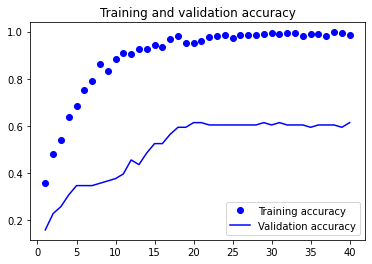

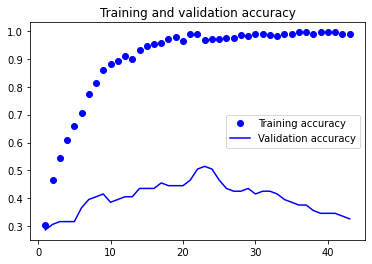

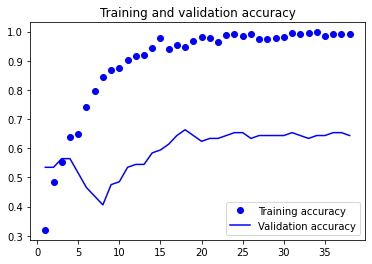

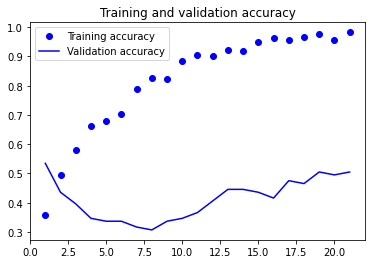

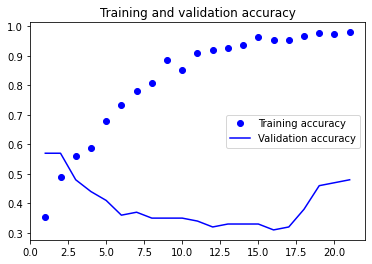

In [12]:
# Displaying curves of loss and accuracy during training

for i in range(N_Fold):
    acc = list_of_histories[i].history["accuracy"]
    val_acc = list_of_histories[i].history["val_accuracy"]
    loss = list_of_histories[i].history["loss"]
    val_loss = list_of_histories[i].history["val_loss"]
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, "bo", label="Training accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.show()

In [13]:
from tensorflow.keras.models import load_model

all_model=[]

with tf.device('/cpu:0'):
    for i in range(N_Fold):
        all_model.append(load_model('my_best_model'+str(i+1)+'.hdf5'))

In [14]:
with tf.device('/cpu:0'):

    model_predict_moyenne = all_model[0].predict([X1_test,X2_test])

    for i in range(1,N_Fold):
        model_predict_moyenne = model_predict_moyenne + all_model[i].predict([X1_test,X2_test])

    model_predict_moyenne = model_predict_moyenne/N_Fold

    # Calcul précision de méthode k_fold
    print(np.mean(np.argmax(model_predict_moyenne, axis = 1)==y_test))

0.6428571428571429


In [15]:
np.sum(y_test==2)/len(y_test)

0.5952380952380952

In [16]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
resnet50 (Functional)           (None, 7, 7, 2048)   23587712    input_14[0][0]                   
                                                                 input_15[0][0]                   
__________________________________________________________________________________________________
flatten_8 (Flatten)             (None, 100352)       0           resnet50[0][0]             